<a href="https://colab.research.google.com/github/SyamReddy2004/Large-Language-Model/blob/main/Class%20assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# =========================
# Single-Layer Perceptron
# =========================
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for _ in range(self.n_iters):
            for i in range(n_samples):
                linear = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(linear)
                update = self.lr * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return self.activation(linear)

# =========================
# Binary Classification Dataset
# =========================
# Class 0
X0 = np.array([
    [1, 2],
    [2, 1],
    [2, 3],
    [3, 2]
])

# Class 1
X1 = np.array([
    [6, 5],
    [7, 6],
    [8, 5],
    [7, 8]
])

X = np.vstack((X0, X1))
y = np.array([0]*len(X0) + [1]*len(X1))

# =========================
# Train & Test
# =========================
perceptron = Perceptron(learning_rate=0.1, n_iters=200)
perceptron.fit(X, y)

predictions = perceptron.predict(X)

print("Predictions:", predictions)
print("Actual     :", y)


Predictions: [0 0 0 0 1 1 1 1]
Actual     : [0 0 0 0 1 1 1 1]


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8758 - loss: 0.4395
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9658 - loss: 0.1170
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9773 - loss: 0.0742
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0576
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0430
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0873
Test Accuracy: 0.9768999814987183
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


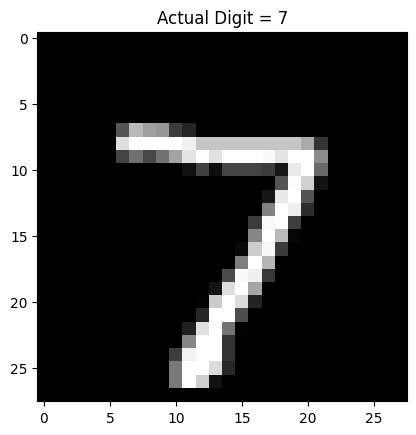

Predicted Digit: 7


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
# 1. Load the MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize pixel values

x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Build the Neural Network

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # converts 2D to 1D
    layers.Dense(128, activation='relu'),   # hidden layer
    layers.Dense(10, activation='softmax')  # output layer (0–9)
])
# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model

model.fit(x_train, y_train, epochs=5)  # Train for 5 epochs

# 6. Evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# 7. Predict a digit

predictions = model.predict(x_test)

# Show the first test image
plt.imshow(x_test[0], cmap='gray')
plt.title("Actual Digit = " + str(y_test[0]))
plt.show()

# Print predicted digit
print("Predicted Digit:", predictions[0].argmax())

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# dataset
data = load_breast_cancer()
X = data.data
y = data.target

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(1, activation='sigmoid')
])

# compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# train
model.fit(X_train, y_train, epochs=5)

# evaluate
model.evaluate(X_test, y_test)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4009 - loss: 50.1638   
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7030 - loss: 3.6765 
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8466 - loss: 1.5418 
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9001 - loss: 0.7054 
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9170 - loss: 0.4272 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8923 - loss: 0.5799  


[0.6070498824119568, 0.8947368264198303]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3455 - loss: 2.7692
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1103 - loss: 3.4205
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1041 - loss: 3.4901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0951 - loss: 3.4251
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0991 - loss: 3.4397
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0924 - loss: 3.3439
Test Accuracy: 0.09799999743700027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


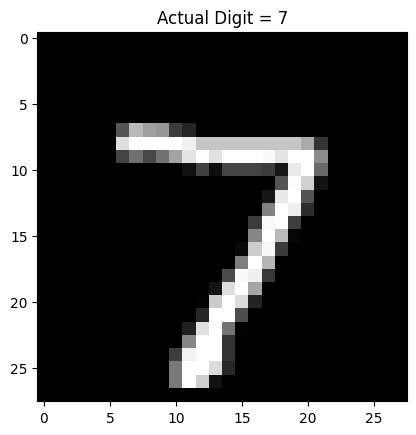

Predicted Digit: 0


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
# 1. Load the MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize pixel values

x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Build the Neural Network

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # converts 2D to 1D
    layers.Dense(64, activation='relu'),   # hidden layer
    layers.Dense(32, activation='relu')  # output layer (0–9)
])
# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model

model.fit(x_train, y_train, epochs=5)  # Train for 5 epochs

# 6. Evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# 7. Predict a digit

predictions = model.predict(x_test)

# Show the first test image
plt.imshow(x_test[0], cmap='gray')
plt.title("Actual Digit = " + str(y_test[0]))
plt.show()

# Print predicted digit
print("Predicted Digit:", predictions[0].argmax())